    v1.1 2018/10/23 JLC Ajout image architecture réseau + correction fautes de frappe
    v1.2 2019/06/13 BA  MAJ par Benjamin AILLOUD (stage L2 informatique)
    V2.0 2020/01/19 JLC Passage à Tensorflow2

<span style="font-weight:bold;color:blue;font-family:arial;font-size:xx-large;">
    Machine learning avec les modules Python tensorflow2/keras 
</span>

<span style="font-weight:bold;color:blue;font-family:arial;font-size:x-large;">
    Entraînement / exploitation d'un réseau de neurones dédié à la reconnaissance de chiffres manuscrits.</span>

<div class="alert alert-block alert-info">
<b>Info:</b> Document initialement inspiré du travail de Jason Brownlee : *Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras* publié en juin 2016 à l'adresse https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/
</div>

# La banque d'images du MNIST

Dans ce travail, nous utiliserons les images de la banque MNIST disponible sur Internet (http://yann.lecun.com/exdb/mnist/).

La banque MNIST propose des images en ton de gris de 28 $\times$ 28 pixels, correspondant à des matrice de 28 $\times$ 28 d'entiers compris entre 0 et 255 :
<img src="./figures/MnistExamples.png" width="500" border="2">
<p style="text-align:center; font-style:italic; font-size:12px;">
[crédit image : Josef Steppan — Travail personnel, CC BY-SA 4.0, commons.wikimedia.org/w/index.php?curid=64810040)]
</p>

L'ensemble des images du jeu de données MNIST contient **60000 images d'apprentissage** et **10000 images de test**, soit en tout **70000 images** de 28 x 28 pixels.

# A/ Quelques concepts fondamentaux autour des réseaux de neurones

## Le neurone artificiel
C'est une unité de traitement informatique programmée pour calculer la valeur de sa **fonction d'activation** en un point défini par la **combinaison linéaire de ses entrées** $\Sigma_i w_i x_i - b$ :

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="./figures/nn_1.png" width="600" ><br>
    [crédit image : JLC]
</p>

L'entrée *Bias* reçoit le stimuli `-1` affecté du poids $b$ pour donner une **translation** (décalage) dans la fonction d'activation.

## Fonction d'activation
Les principaux rôles des fonctions d'activation des neurones artificiels sont :
- donner au neurone artificiel un comportement **non linéaire** (avec par exemple des mécanismes de seuil, de saturation...)
- fixer la plage de sortie de la valeur calculée par le neurone (par exemple sortie dans l'intervalle $[-1 ; 1]$, ou $[0 ; +\infty[$

Exemples de fonction d'activation couramment utilisées :<br />
<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="./figures/activationFunctions.png"> 
    [crédit image : JLC]
</p>

## Structure du réseau à construire 
Dans ce premier TP,  nous allons construire un *réseau dense*, avec :
- une **couche d'entrée** de 784 valeurs comprises entre 0 et 1 (les pixels de l'image 28 $\times$ 28 mis sous forme d'un vecteur de 784 valeurs),
- une **couche cachée** de 784 neurones utilisant la fonction d'activation `relu`,
- une **couche de sortie** à 10 neurones, pour la classification des images en 10 classes associées aux chiffres {0,1,2...9}, utilisant la fonction d'activation `softmax` adaptée aux traitements de classification.

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="./figures/archiReseau.png" alt="archiReseau.png" style="width: 900px;"><br> 
    [crédit image : JLC]
</p>

La fonction d'activation `softmax` utilisée pour les 10 neurones de la couche de sortie permet de "faire ressortir" la sortie $y_i$ de valeur la plus grande : `softmax` donne une valeur très proche de 1 pour le neurone fournissant la plus grande valeur $y_i$, alors que pour tous les autres neurones, la valeur calculée par `softmax` sera proche de zero.

<img src="./figures/softmax.png" width="400">
<p style="text-align:center; font-style:italic; font-size:12px;">[crédit image : JLC]</p>

Remarques : 
- Chaque neurone de la première couche cachée reçoit 785 entrées : les 784 valeurs $x_i$ des pixels de l'image plus l'entrée '-1'. 
- Il y a dons 785 inconnues pour chaque neurone : les 784 poids $w_i$ affectés à chaque entrée $x_i$, plus le  poids $b$ affecté à l'entrée -1 (le biais).
- on compte donc 785 $\times$ 784 inconnues pour la couche cachée et 785 $\times$ 10 inconnues pour la couche de sortie : soit un total de 623290 inconnues dont la valeur doit être optimisée par l'algorithme d'apprentissage du réseau.

C'est un algorithme de **retropropagation de l'erreur** entre valeur attendue et valeur prédite par le réseau qui permet de modifier les valeurs des poids des différentes couches pour minimiser l'erreur. Au fur et à mesure des apprentissages successifs, cette modification des poids du réseau de neurones tend vers un état qui constitue le réseau entraîné.

#  B/ Environnement Python de travail

<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:large"> 
    Le travail sous Python proposé dans ce TP gagne à être fait dans un <span style="font-weight:bold;">environnement Python3 dédié</span> : voir le document <span style="font-style:italic">EnvironnementPython_tf2.pdf</span> si vous n'avez pas encore créé d'environnement Python dédié pour le travail avec les modules Keras et tensorflow.
</span>
</div>

### Environnement Python dédié
Vérification :
- version de Python     : doit être >= 3.6
- version de tensorflow : doit être >= 2.1.0
- version de tf.keras   : doit être 2.2.4-tf
- version de OpenCV     : doit être 3.4.x

In [1]:
import tensorflow as tf
import sys, cv2
print(f"Version de Python    : {sys.version.split()[0]}")
print(f"Version, de Keras    : {tf.keras.__version__}")
print(f"Version de tensorflow: {tf.__version__}")
print(f"Version, de OpenCV   : {cv2.__version__}")

Version de Python    : 3.6.9
Version, de Keras    : 2.2.4-tf
Version de tensorflow: 2.1.0
Version, de OpenCV   : 4.1.2


La documentation (en anglais) du module tf.keras est ici : https://www.tensorflow.org/api_docs/python/tf/keras.

Incrustation des tracés matplotlib dans le cahier IPython et import de modules utiles :

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# C/ Travail à faire

# 1 - Récupération du jeu de données MNIST :

https://fr.wikipedia.org/wiki/Base_de_données_MNIST : La base de données MNIST (*Mixed National Institute of Standards and Technology*), est une base de données de chiffres écrits à la main. C'est un jeu de données très utilisé en apprentissage automatique.<br />
L'ensemble des images du jeu de données MNIST contient **60000 images d'apprentissage** et **10000 images de test**, soit en tout **70000 images** de 28 x 28 pixels.

In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist
(image_train, etiq_train), (image_test, etiq_test) = mnist.load_data() 

<span style="color:blue;font-family:arial">Faire afficher le type des objets `image_train`, `etiq_train`, `image_test` et `etiq_test` :</span>

In [4]:
type(image_train), type(etiq_train), type(image_test), type(etiq_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

<span style="color:blue;font-family:arial">Faire afficher les attributs `shape` et `dtype` des tableaux `image_train`, `etiq_train`, `image_test` et `etiq_test` -> interpréter les réponses :</span>

In [5]:
image_train.shape, image_train.dtype, etiq_train.shape, etiq_train.dtype, 

((60000, 28, 28), dtype('uint8'), (60000,), dtype('uint8'))

In [6]:
image_test.shape, image_test.dtype, etiq_test.shape, etiq_test.dtype, 

((10000, 28, 28), dtype('uint8'), (10000,), dtype('uint8'))

## Visualisation des images et des étiquettes :

<span style="color:blue;font-family:arial;">Avec la fonction `imshow` du module `matplotlib.pyplot` faire afficher en tons de gris la 601-ème image du tableau `image_train`.<br>
Indications :<br>
- utiliser `plt.figure(figsize=(2,2))` pour fixer la taille de l'image ;<br />
- passer l'option `cmap='gray'` à la fonction `imshow` ;
- enlever les graduations en X et Y avec l'instruction  `plt.xticks([]); plt.yticks([])`.</span>

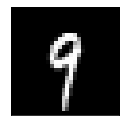

In [7]:
plt.figure(figsize=(2,2))
plt.imshow(image_train[600], cmap='gray')
plt.xticks([]); plt.yticks([]);

<span style="color:blue;font-family:arial">Vérifier que l'étiquette associée à `image_train[600]` est bien `9` :</span>

In [8]:
etiq_train[600]

9

<span style="color:blue;font-family:arial">Écrire une fonction `plot_image` qui prend les arguments `r, L, C` et qui affiche les images MNIST commençant au rang `r` dans une grille de `L` lignes et `C` colonnes (utiliser `plt.subplot` pour la grille d'images). La figure affichée aura les dimensions 10 x 10 pouces.

In [9]:
def plot_image(r,L,C):
    plt.figure(figsize=(10,10))
    for i in range(L*C):
        plt.subplot(L, C, i+1)
        plt.imshow(image_train[r+i],cmap='gray', interpolation='none')
        plt.xticks([])
        plt.yticks([])

<span style="color:blue;font-family:arial">Fait afficher 100 images à partir de la 601 ème dans une grille de 10x10 : </span>

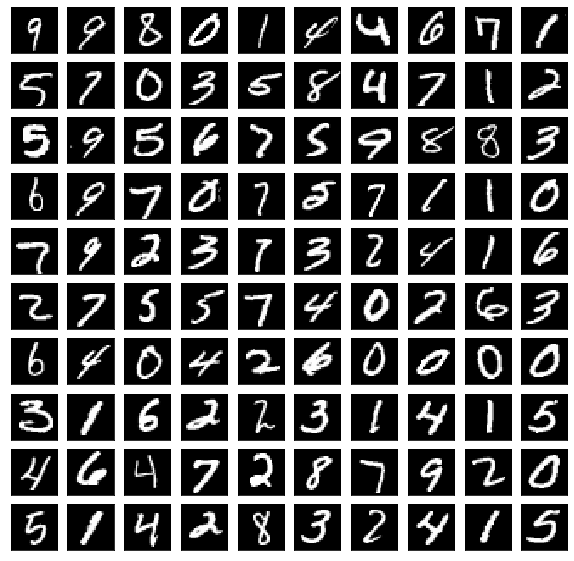

In [10]:
plot_image(600, 10, 10)

# 2 - Pré-traitement des données

**Le pré-traitement des données constitue une des étapes fondamentales de l'apprentissage des réseaux de neurones.**

Pour adapter les données au réseau de neurones, on va transformer les matrice d'entiers `uint8` représentant les images 28 x 28 pixels en vecteurs **normalisés** $(V_i)_{i=0..783}$ de 784 valeurs réelles $V_i$  avec $ 0 \leqslant V_i \leqslant 1.$<br />

*Nota* : une autre façon de faire consisterait à garder les matrices d'entiers en utilisant l'option de Keras qui permet de dire que la couche d'entrée est constituée de matrices. Tu pourras voir ce cas dans le TP2 qui met en oeuvre un réseau convolutionnel.

## 2.1 - Transformation des matrices d'entrée en vecteurs normalisés :

On récupère d'abord le nombre d'images d'entrainement et de test :

In [11]:
nb_image_train = image_train.shape[0]
nb_image_test  = image_test.shape[0]
print(f"{nb_image_train} images d'entrainement et {nb_image_test} images de test")

60000 images d'entrainement et 10000 images de test


Puis on récupère le nombre de pixels des images grâce à l'attribut 'size' de la première image par exemple :

In [12]:
nb_pixels = image_train[0].size        # normalement : 28 x 28 = 784 pixels
print(f"{nb_pixels} pixels dans chaque image")

784 pixels dans chaque image


La *mise à plat* des matrices sous forme de vecteurs de floats se fait facilement en utilisant les méthodes `reshape(new_shape)` et `astype('float32')` de ndarray :

In [13]:
x_train = image_train.reshape((nb_image_train, nb_pixels)).astype('float32')
x_test  = image_test.reshape((nb_image_test, nb_pixels)).astype('float32')

Il ne reste plus qu'à normaliser les vecteurs en les dicisant par 255 :

In [14]:
x_train = x_train/255
x_test  = x_test/255

<span style="color:blue;font-family:arial">Vérifie la tailles des tableaux `x_train` et `x_test`  :</span>

In [15]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

<span style="color:blue;font-family:arial">Vérifie les valeurs min et max des tableaux `x_train` et `x_test`  :</span>

In [16]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [17]:
x_test.min(), x_test.max()

(0.0, 1.0)

## 2.2 -- *Hot coding* des étiquettes :

Les étiquettes des images sont des valeurs entières comprises entre 0 et 9. Pour traiter efficacement le problème de classification, on utilise la technique de `hot coding` qui remplace les valeurs des différentes classes par un vecteur comportant autant d'éléments que de classes à choisir.<br />
Par exemple :
- l'étiquette `0` sera transformée en `[1 0 0 0 0 0 0 0 0 0]`.
- l'étiquette `3` sera transformée en `[0 0 0 1 0 0 0 0 0 0]`.
- l'étiquette `9` sera transformée en `[0 0 0 0 0 0 0 0 0 9]`.

Pour réaliser le codage des étiquettes, on utilise la fonction `to_categorical` du module `tensorflow.keras.utils` :

In [18]:
from tensorflow.keras.utils import to_categorical
# 'hot encoding' des sorties :
y_train = to_categorical(etiq_train)
y_test  = to_categorical(etiq_test)

<span style="color:blue;font-family:arial">Vérifie les 10 premières valeurs de `etiq_train` et les 10 premières valeurs `hot encoded` de `y_train` :</span>

In [19]:
etiq_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [20]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# 3 - Construction du réseau de neurones :

On va maintenant construire un réseau de neurones **séquentiel** (cf https://keras.io/models/sequential ) en **4 lignes** Python à l'aide du module **keras** qui permet une manipulation de haut niveau des outils proposés par le module **tensorflow**.<br />

Les spécifications du réseau de neurones à construire sont :
- les entrées sont constituées des 784 pixels, mis sous forme d'un vecteur normalisé ;
- le réseau de neurones comporte une première couche de 784 neurones utilisant la fonction d'activation `relu` (*retified linear unit*, voir https://keras.io/activations) ;
- la couche de sortie comporte 10 neurones utilisant la fonction d'activation `softmax` pour convertir les sorties en valeur de probalibilités permettant de choisir une des 10 classes ;
- La **fonction d'erreur** (*loss function*) utilisée pour mesurer l'erreur entre étiquette et valeur prédite par le réseau est de type `Logarithmic loss`. Dans Keras elle correspond à la *loss function* `categorical_crossentropy` :
<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="./figures/CrossEntropy.png" width=550>
    (crédit image : vidéo "Deep Learning TensorFlow" de Martin Gorner)
</p>
- l'algorithme de descente de gradient ADAM est utilisé pour l'optimisation des poids des neurones par rétro-progation de l'erreur. 

### Rendre les tirages aléatoires reproductibles

Les poids d'un réseau de neurones sont initialisés par tirage aléatoire. Lorsqu'on invoque plusieurs fois de suite des générateurs aléatoires comme `numpy.random.rand` par exemple, on constate qu'à chaque invocation, on obtient une suite de valeurs aléatoires différentes :

In [21]:
print(np.random.rand(5))
print(np.random.rand(5))

[0.64342747 0.87941222 0.56274464 0.76405988 0.63513621]
[0.24591552 0.68149342 0.35843875 0.81247263 0.13899982]


Ceci présente un gros inconvénient car les poids d'un réseau de neurones sont initialisés à la construction du réseau par tirage aléatoire : ceci veut dire qu'à chaque fois qu'on relance la cellule ou le cahier IPython par exemple on obtient un état initial du réseau différent conduisant à un résultat de réseau entraîné différent !

Pour corriger ce comportement, on fixe la **graine** (*seed*) des générateurs de façon à générer des suites de nombres aléatoires reproductibles :

In [22]:
seed = 43

In [23]:
np.random.seed(seed)
np.random.rand(5)

array([0.11505457, 0.60906654, 0.13339096, 0.24058962, 0.32713906])

In [24]:
np.random.seed(seed)
np.random.rand(5)

array([0.11505457, 0.60906654, 0.13339096, 0.24058962, 0.32713906])

## Construction du réseau de neurones dense en 4 lignes avec le module Keras :

In [25]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

nb_classes = 10
np.random.seed(43)

# les 4 lignes pour construire le réseau de neurones:
model = Sequential()
model.add(Dense(nb_pixels, input_dim=nb_pixels, activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

<span style="color:blue;font-family:arial">Avec la méthode `summary` de l'objet `model`, fait afficher la description du modèle : explique les valeurs des paramètres ?</span>

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


<span style="color:blue;font-family:arial">Peux-tu retrouver le nombre total de paramètres avec une formule simple ?</span>

In [27]:
785*784+785*10

623290

### Sauvegarder l'état initial du  réseau

On peut sauvegarder l'état initial des poids du réseau non-entraîné (valeurs aléatoires) avec la méthode `Model.save_weights`. Ce sera utile plus loin pour remettre le réseau à son état initial avant de relancer d'autres entraînements :

In [28]:
import os
if not os.path.exists("weights"): os.mkdir("weights")
model.save_weights('weights/initial')
files=[os.path.join("weights",f) for f in os.listdir("weights") if f.startswith("initial")]
for f in files: print(f)

weights/initial.data-00000-of-00001
weights/initial.index


Attention : tu donnes le nom `"initial"` mais la méthode `Model.save_weights` l'utilise pour créer plusieurs fichiers préfixés par `"initial"`.<br>
Lors de la lecture ultérieure des poids du réseau avec la méthode `Model.load_weights` il suffira de donner le même nom pour que cela focntionne.

# 4 - Entraînement du réseau :

Le modèle est entraîné sur les $60\,000$ images :
- en utilisant :
    - les données d'entrée `x_train` (images)
    - les données de sortie `y_train` (étiquettes).
- un certain nombre de fois de suite donné par le paramètre `epochs`, 
- avec mises à jour des poids (*back propagation*) toutes les 200 images (paramètre `batch_size`)

In [29]:
# au cas on on exécuterait plusieurs fois cette cellule, il faut 
# prendre soin de bien de ré-initialiser les poids du réseau à leur valeurs aléatoires...
model.load_weights("weights/initial") 

hist = model.fit(x_train, y_train, 
                 epochs=5, 
                 batch_size=200, 
                 verbose=1)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2780 - accuracy: 0.9212
Epoch 2/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1099 - accuracy: 0.9679
Epoch 3/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0706 - accuracy: 0.9796
Epoch 4/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0504 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0355 - accuracy: 0.9900


le résultat `hist` est un objet de type `tensorflow.python.keras.callbacks.History`, qui possède un attribut `history` de type `dict`, avec les clefs `loss` et `accuracy`

In [30]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

In [31]:
hist.history['loss']

[0.27803440737227597,
 0.10986987270414829,
 0.0706054699420929,
 0.05035115820976595,
 0.03547060122713447]

### Tracé des courbes `accuracy` et `loss` :

La fonction `plot` du module `utils` permet de tracer les courbes de précision et de perte en utilisant les données stockées dans l'objet `hist` :

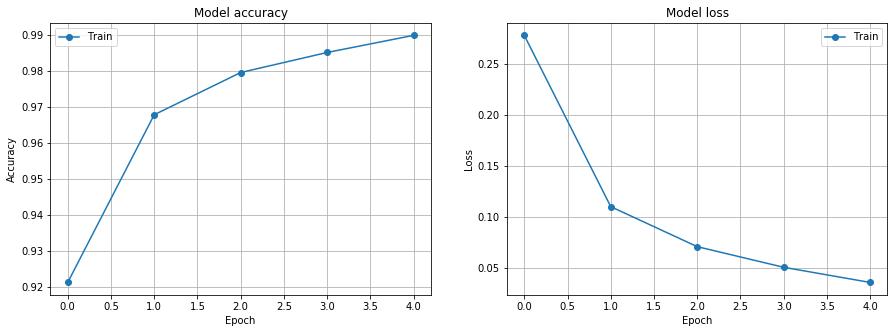

In [32]:
from utils import plot
plot(hist)

On peut penser qu'augmenter le nombre d'`epochs` peut permettre d'aumengenter les performances du réseau... mais en fait on court le risque de sur-entraînner le réseau (*over-fit*)

## 4.1 - Entraînement du réseau avec tests pendant l'entraînement

Pour avoir un meilleur indicateur sur la qualité de l'entraînement du réseau, il est intéressant de tester à chaque `epoch` la précison du réseau entraîné en utilisant les données de test. Ceci permet d'avoir une meilleur évaluation de l'évolution de la précision du réseau calculée avec les données du test (clef `val_accuracy`) :

In [33]:
model.load_weights("weights/initial")

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test), # jeu de données qui sera utilé à la fin de cheque epoch
                 epochs=10, 
                 batch_size=200, 
                 verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2434 - accuracy: 0.9290 - val_loss: 0.1209 - val_accuracy: 0.9637
Epoch 2/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0944 - accuracy: 0.9726 - val_loss: 0.0858 - val_accuracy: 0.9741
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0620 - accuracy: 0.9818 - val_loss: 0.0704 - val_accuracy: 0.9791
Epoch 4/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0435 - accuracy: 0.9875 - val_loss: 0.0690 - val_accuracy: 0.9793
Epoch 5/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0314 - accuracy: 0.9914 - val_loss: 0.0654 - val_accuracy: 0.9801
Epoch 6/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0234 - accuracy: 0.9939 - val_loss: 0.0587 - val_accuracy: 0.9813
Epoch 7/10
60000/60000 [==============================] 

On a cette fois non seulement les valeurs `loss` et `accuracy` mais aussi `val_loss` et `val_accuracy` calculées en faisant tourner le réseau à chaque `epoch` avec les données de test :

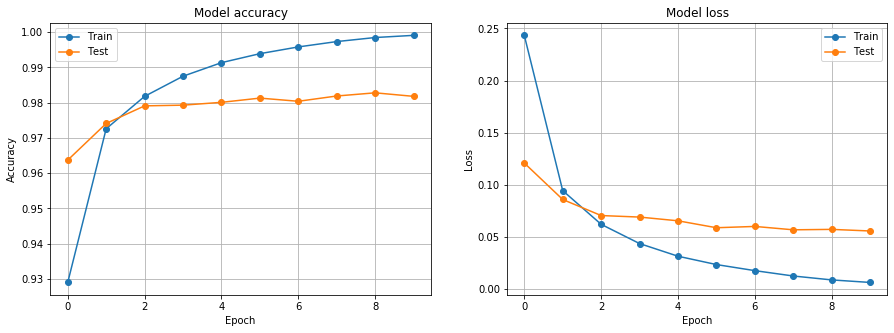

In [34]:
plot(hist)

On voit clairement que la précision calculée avec les données de Test tend vers une limite voisine de 0.98 . <br />
Les performances du réseau peuvent même se dégrader si on continue l'entraînement (phénomène connu sous le nom de sur-apprentissage (aka *over fiting*).

### Arrêter l'entrainement avant l'*over-fit*

Keras propose des mécanisme permettant d'arrêter automatiquement l'apprentissage en surveillant par exemple la croissance de la précision d'une `epoch` à l'autre.
Ce point est traité dans le cahier Ipython :  <a href="TP1_MNIST_dense_overfit.ipynb"> TP1_MNIST_dense_overfit.ipynb </a >

### Sauvegarder les poids du  réseau entraîné

La méthode `Model.save_weights`permet d'enregistrer les **poids** du réseau entraïné dans un fichier :

In [35]:
import os
if not os.path.exists("weights"): os.mkdir("weights")
model.save_weights('weights/check_points')
files=[os.path.join("weights",f) for f in os.listdir("weights") if f.startswith("check")]
for f in files: print(f)

weights/checkpoint
weights/check_points.data-00000-of-00001
weights/check_points.index


### Sauvegarder la strucure du réseau et ses poids

La méthode `Model.save`permet d'enregistrer **toute la structure et les poids** du réseau entraïné dans un fichier.<br />Ceci permet de recréer plus tard *from scratch* le réseau entrainé pour passer en phase exploitation du réseau par exemple, en utilisant la fonction`tf.keras.models.load_model` :

In [36]:
import os
if not os.path.exists("models"): os.mkdir("models")
model.save('models/model1') 
files=[os.path.join("models",f) for f in os.listdir("models") if f.startswith("model")]
for f in files: print(f)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/model1/assets
models/model1


# 5/ Vérication de l'apprentissage avec le jeu de test

La méthode `predict`permet de demander au modèle sa prédiction pour une ou plusieurs entrées.<BR />
Exemple de prédition pour une image test numéro i dans le jeu d'images de test (0 <= i <= 10000) :

valeur trouvée par le réseau de neurones pour la 1000ème image :
	[0.0000 0.0000 0.0000 0.0004 0.0000 0.0000 0.0000 0.0001 0.0000 0.9994]

valeur arrondie à 1 chiffre : [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
rep[0].argmax() donne : 9

La bonne réponse est 9, soit en 'hot coded' : [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]


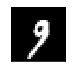

In [37]:
i = 1000
rep = model.predict(x_test[i:i+1])

np.set_printoptions(formatter={'float':'{:0.4f}'.format})
print(f"valeur trouvée par le réseau de neurones pour la {i}ème image :\n\t{rep[0]}\n")

np.set_printoptions(formatter={'float':'{:0.1f}'.format})
print(f"valeur arrondie à 1 chiffre : {rep[0]}")
print(f"rep[0].argmax() donne : {rep[0].argmax()}")

plt.figure(figsize=(1,1))
digit = image_test[i]
plt.imshow(digit, cmap='gray');
plt.xticks([]); plt.yticks([])

print(f"\nLa bonne réponse est {etiq_test[i]}, soit en 'hot coded' : {y_test[i]}")

<span style="color:blue;font-family:arial">Écrire les instructions Python pour calculer avec les données de test le pourcentage d'erreur du réseau entrainé.... <br/> 
Conseil: la variable rep contient pour chaque image une liste de 10 probabilités, il pourra être utile d'utiliser la fonction `argmax` de la librairie numpy pour obtenir le chiffre de plus haute probabilité.</span>


In [38]:
results = model.predict(x_test)
bonne_rep = 0
for i, res in enumerate(results):
    bonne_rep += (np.argmax(res) == etiq_test[i])
print(f"taux de réussite : {bonne_rep/len(x_test)*100:.2f} %")

taux de réussite : 98.18 %


### 5.1 - Afficher la matrice de confusion

La cellule suivante affiche la **matrice de confusion** en utilisant les modules `sklearn` et `seaborn` :

False predictions: 182/10000
Pred: [9 9 2 7 3 7 0 2 2 8 8 1 3 4 7 9 4 0 5 2 6 8 6 5 2 4 9 5 1 7 3 3 3 9 1 9 7
 2 5 6 0 7 3 0 8 7 4 8 5 0 9 9 9 0 7 0 9 1 2 0 0 1 8 7 4 3 1 0 1 7 0 2 5 5
 1 2 9 9 3 0 1 1 4 0 5 5 3 2 6 8 8 4 1 2 3 2 5 4 1 2 0 3 0 7 9 7 7 1 7 4 7
 1 7 8 5 7 5 3 4 6 8 9 6 8 5 3 7 7 5 7 9 3 3 8 9 9 0 3 8 9 7 6 7 5 4 8 7 6
 4 7 6 8 0 8 8 4 6 0 6 9 2 2 2 5 4 8 7 3 7 8 6 0 6 0 0 0 7 5 4 8 7 8]
Real: [4 2 4 2 5 3 6 8 8 2 1 2 7 8 8 8 5 6 6 7 4 7 4 6 7 9 4 9 7 5 8 5 2 4 7 7 8
 4 9 2 2 3 9 8 2 3 9 7 6 2 0 8 4 2 3 6 4 6 1 8 9 9 9 9 2 5 7 9 6 4 8 3 9 3
 9 1 5 4 8 6 2 9 6 5 8 8 9 7 4 2 7 0 7 6 1 4 3 9 7 0 8 9 9 2 7 1 9 2 2 9 8
 9 2 9 6 8 3 8 9 8 0 4 1 1 1 4 9 3 8 9 4 5 5 3 3 3 3 9 9 8 9 2 0 9 8 0 8 1
 6 2 0 4 8 5 2 6 0 8 8 4 7 7 7 8 9 0 2 6 9 2 5 4 5 2 5 2 4 6 9 2 2 3]


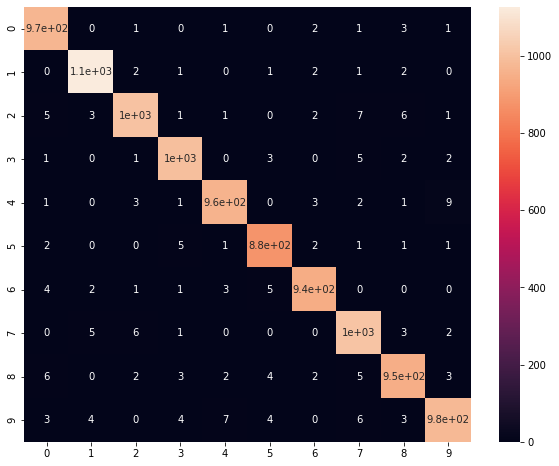

In [39]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix

classes   = np.array([0,1,2,3,4,5,6,7,8,9])
predicted = model.predict_classes(x_test)
target    = np.argmax(y_test, axis=1)

fail = [x != y for x,y in zip(predicted, target)]
print("False predictions: %d/%d" % (np.sum(fail), len(results)))
print("Pred:", predicted[fail])   # print only predicted[True] skipping predicted[False]
print("Real:", target[fail])

cm = confusion_matrix(target,predicted)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
plt.figure(figsize=(10,8))
sn.heatmap(df_cm, annot=True)
plt.show()

# 6/ Évolution du réseau : augmentation du nombre de couches cahées 

On peut essayer de construire un réseau avec plus de couches. Par exemple :
- couche d'entrée avec les 784 pixels
- couche cachée 1 : 784 neurones, fonction d'activation `relu`
- couche cachée 2 : 300 neurones, fonction d'activation `relu`
- couche cachée 3 : 100 neurones, fonction d'activation `relu`    
- couche de sortie : 10 neurone, fonction d'activation `softmax`.

<span style="color:blue;font-family:arial">Peux-tu construire le réseau `model2` correspondant avec Keras ?</span>

In [40]:
np.random.seed(43)
model2 = Sequential()
model2.add(Dense(784, input_dim=784, activation='relu'))
model2.add(Dense(300, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<span style="color:blue;font-family:arial">Avec la méthode `summary` de l'objet `model2`, fait afficher la description du modèle : expliquer les valeurs des paramètres ?</span>

In [41]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 882,050
Trainable params: 882,050
Non-trainable params: 0
_________________________________________________________________


`plot_model` permet de dessiner la structure du réseau :

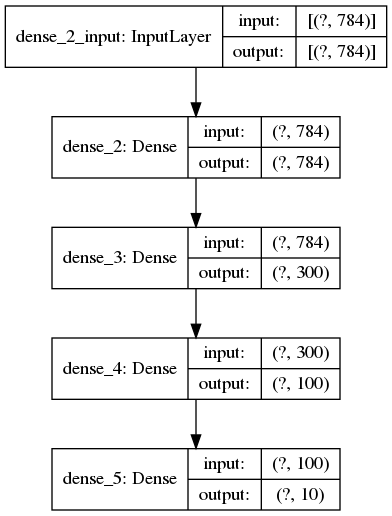

In [42]:
tf.keras.utils.plot_model(model2, show_shapes=True)

<span style="color:blue;font-family:arial">Entraînne le réseau `model2` avec les mêmes données que `model`, et fait tracer les courbes de précission et d'erreur :</span>

In [43]:
hist2 = model2.fit(x_train, y_train, 
                   validation_data=(x_test, y_test), 
                   epochs=10, 
                   batch_size=200, 
                   verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2510 - accuracy: 0.9275 - val_loss: 0.1023 - val_accuracy: 0.9680
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0844 - accuracy: 0.9743 - val_loss: 0.0749 - val_accuracy: 0.9773
Epoch 3/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0552 - accuracy: 0.9827 - val_loss: 0.0788 - val_accuracy: 0.9756
Epoch 4/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.0718 - val_accuracy: 0.9767
Epoch 5/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0293 - accuracy: 0.9904 - val_loss: 0.0651 - val_accuracy: 0.9810
Epoch 6/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0227 - accuracy: 0.9923 - val_loss: 0.0718 - val_accuracy: 0.9803
Epoch 7/10
60000/60000 [==============================] 

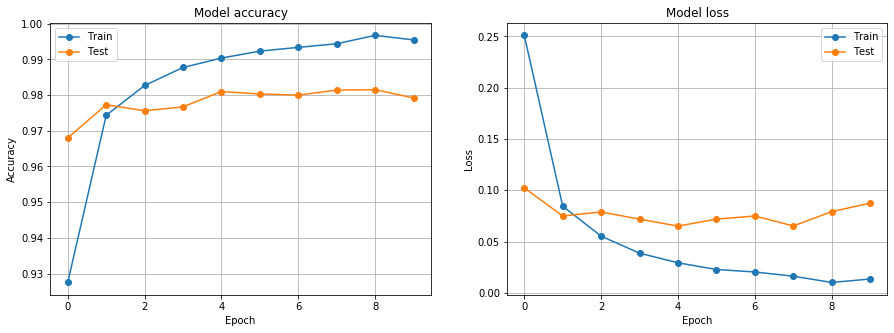

In [44]:
plot(hist2)

<span style="color:blue;font-family:arial"> Augmenter le nombre de couches a t'il un impact sur les performances du réseau ?<br />
Que peut on conclure sur l'utilité de complexifier ce type de réseau ? </span>

Double-clic ici pour inscrire ta réponse : pas vraimment => ce n'est pas utile de complexifier le réseau.

# 7/ Utiliser le réseau avec ses propres images

On va utiliser le réseau entrainé pour voir comment il réagit avec des chiffres "écrits à la main" différents des chiffres de la banque MNIST...<br />
Pour cela on utilise les images du dossier `chiffres` :

In [45]:
import os
images = ['chiffres/'+f for f in os.listdir('chiffres') if f.endswith(".png")]
images.sort()
print("Images du dossier 'chiffres' :")
for im in images: print(im)

Images du dossier 'chiffres' :
chiffres/0_jlc.png
chiffres/1_jlc.png
chiffres/2_jlc.png
chiffres/3_jlc.png
chiffres/4_jlc.png
chiffres/5_jlc.png
chiffres/6_jlc.png
chiffres/7_jlc.png
chiffres/8_jlc.png
chiffres/9_jlc.png


### Lecture des fichiers image avec openCV

In [46]:
import cv2
# lecture des images -> matrices ndarray 28x28 
input_data = [255-cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2GRAY) for image in images]
input_data = np.array(input_data)
input_data.shape, input_data.dtype  # on doit avoir 10 matrices de 28 x 28 valeurs 

((10, 28, 28), dtype('uint8'))

#### Visualistion des images :

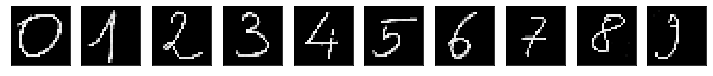

In [47]:
plt.figure(figsize=(15,5))
for i,M in enumerate(input_data):  
    plt.subplot(1,12,i+1)
    plt.imshow(input_data[i], cmap='gray', interpolation='none');
    plt.xticks([]); plt.yticks([])

transformation des matrices 28x28 en vecteurs de float normalisés :

In [48]:
nb_images = input_data.shape[0]
# mise 'à plat' des matrices sous forme de vecteurs de floats :
x_photo = input_data.reshape(nb_images, 28*28).astype('float32')
# normalisation des données :
x_photo /= 255

prédiction du réseau entrainé, avec les images perso :

In [49]:
np.set_printoptions(formatter={'float': '{:0.2f}'.format})  # demander à numpy d'afficher 2 décimales

rep = model.predict(x_photo)
print(rep)

[[0.93 0.00 0.05 0.00 0.00 0.01 0.00 0.01 0.00 0.00]
 [0.00 0.95 0.00 0.01 0.00 0.01 0.01 0.01 0.01 0.01]
 [0.00 0.00 0.98 0.01 0.00 0.00 0.00 0.00 0.01 0.00]
 [0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00]
 [0.01 0.01 0.02 0.00 0.00 0.26 0.57 0.00 0.14 0.00]
 [0.00 0.13 0.15 0.16 0.20 0.06 0.00 0.21 0.09 0.00]
 [0.11 0.00 0.02 0.02 0.01 0.06 0.04 0.00 0.73 0.00]
 [0.00 0.04 0.00 0.94 0.00 0.02 0.00 0.01 0.00 0.00]]


In [50]:
[r.argmax() for r in rep]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 3]

In [51]:
for r in rep:
    print(f"{r.argmax()} avec la probablilité {r.max():.2f}")

0 avec la probablilité 0.93
1 avec la probablilité 0.95
2 avec la probablilité 0.98
3 avec la probablilité 1.00
4 avec la probablilité 1.00
5 avec la probablilité 1.00
6 avec la probablilité 0.57
7 avec la probablilité 0.21
8 avec la probablilité 0.73
3 avec la probablilité 0.94


False predictions: 1/10
Pred: [3]
Real: [9]


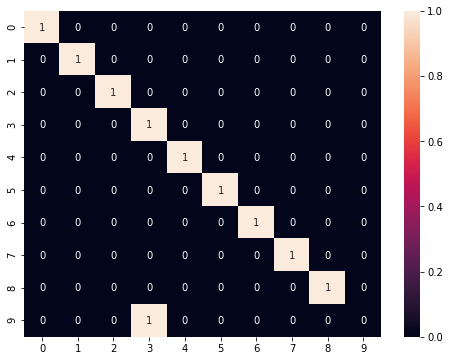

In [52]:
classes = np.array([0,1,2,3,4,5,6,7,8,9])

predicted = np.array([r.argmax() for r in rep])
target    = np.array([0,1,2,3,4,5,6,7,8,9])

fail = [x != y for x,y in zip(predicted, target)]
print("False predictions: %d/%d" % (np.sum(fail), len(predicted)))
print("Pred:", predicted[fail])   # print only predicted[True] skipping predicted[False]
print("Real:", target[fail])

cm = confusion_matrix(target,predicted)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
plt.figure(figsize=(8,6))
sn.heatmap(df_cm, annot=True)
plt.show()

Avec le deuxième réseau dense :

In [53]:
rep = model2.predict(x_photo)
print(rep)

[[0.99 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.90 0.00 0.00 0.00 0.02 0.05 0.00 0.03 0.00]
 [0.00 0.00 0.99 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00]
 [0.00 0.01 0.00 0.18 0.02 0.00 0.00 0.79 0.00 0.00]
 [0.30 0.00 0.02 0.02 0.00 0.05 0.22 0.00 0.39 0.00]
 [0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00]]


In [54]:
[r.argmax() for r in rep]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 3]

In [55]:
for r in rep:
    print(f"{r.argmax()} avec la probablilité {r.max():.2f}")

0 avec la probablilité 0.99
1 avec la probablilité 0.90
2 avec la probablilité 0.99
3 avec la probablilité 1.00
4 avec la probablilité 1.00
5 avec la probablilité 1.00
6 avec la probablilité 1.00
7 avec la probablilité 0.79
8 avec la probablilité 0.39
3 avec la probablilité 1.00


False predictions: 1/10
Pred: [3]
Real: [9]


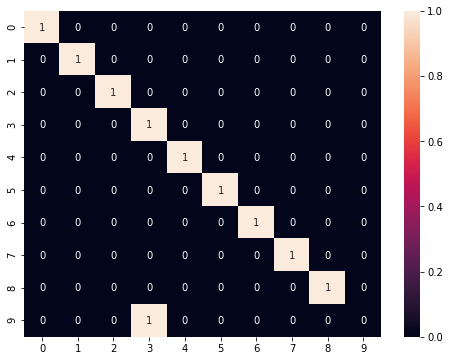

In [56]:
classes = np.array([0,1,2,3,4,5,6,7,8,9])

predicted = np.array([r.argmax() for r in rep])
target    = np.array([0,1,2,3,4,5,6,7,8,9])

fail = [x != y for x,y in zip(predicted, target)]
print("False predictions: %d/%d" % (np.sum(fail), len(predicted)))
print("Pred:", predicted[fail])   # print only predicted[True] skipping predicted[False]
print("Real:", target[fail])

cm = confusion_matrix(target,predicted)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
plt.figure(figsize=(8,6))
sn.heatmap(df_cm, annot=True)
plt.show()

beaucoup mieux ?

Les résultats montrent :
- que le réseau à 1 seule couche cachée et à 2 couches cachées donnent des performances proches pour les images MNIST,
- que l'apprentissage d'un réseau dense reste assez sensible à la nature du jeu de données : les images de chiffres faites 'maison' ne ressemblent pas tout à fait à celles de la banque MNIST, d'où des erreurs de classification avec un simple réseau dense.

# La suite....

Pour aller au-delà des 98% de reconnaissance des chiffres, il faut passer à une autre architecture de réseau plus adaptée au traitement des images : les réseaux **convolutionnels**, traités dans le prochain cahier IPython `TP2_MNIST_convol.ipynb`.

# Autres ressources intéressantes... des vidéos :

In [57]:
%%HTML
<iframe src="https://www.youtube.com/embed/trWrEWfhTVg" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [58]:
%%HTML
<iframe src="https://www.youtube.com/embed/aircAruvnKk" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [59]:
%%HTML
<iframe src="https://www.youtube.com/embed/IHZwWFHWa-w" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [60]:
%%HTML
<iframe src="https://www.youtube.com/embed/Ilg3gGewQ5U" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>